SMS data is available in .csv format, lets import it from google colab

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
#importing the data
data=pd.read_table('/gdrive/MyDrive/AIML/NLP/Rajeev_Notebook_1/Data/sms.tsv', header=None, names=['label','message'])

In [ ]:
data.sample(5)

,label,message
145,ham,Yes see ya not on the dot
2645,ham,My friends use to call the same.
4577,spam,Congratulations ur awarded 500 of CD vouchers ...
2887,ham,No probs hon! How u doinat the mo?
4258,spam,important information 4 orange user . today is...


In [ ]:
data.shape

(5572, 2)

In [ ]:
#Spam Vs Ham

data.groupby('label').count()

,message
label,
ham,4825
spam,747


In [ ]:
#Check out the legitmate ham messages

msg_num=np.random.randint(0,data.shape[0])
print(data.loc[msg_num, 'label'], ':', data.loc[msg_num, 'message'])

ham : I'm already back home so no probably not


In [ ]:
#Chek missing value

data.isnull().sum()

label      0
message    0
dtype: int64

In [ ]:
data['label'].unique()

array(['ham', 'spam'], dtype=object)

In [ ]:
#Lets convert lables into numerical values
data['label_num']=data.label.map({'ham':0, 'spam':1})

In [ ]:
data.head()

,label,message,label_num
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


Now here we have converted labels into numerical values.

### 2. Create training and test data

Dear, keep in mind that In NLP we will have to create Vocabulary on training data and not on entire data. So before going for Tokenization and vectorization lets devide data into train and test dataset.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
#Splitting data into X & Y set
sms_train, sms_test, y_train, y_test=train_test_split(data.message, data.label_num, random_state=2)

In [ ]:
#Training data
print(sms_train.shape)
print(y_train.shape)

(4179,)
(4179,)


In [ ]:
#Printing test data
print(sms_test.shape)
print(y_test.shape)

(1393,)
(1393,)


###3. Tokenization & Vectorization

Using CountVectorizer, to get numeric feature

In [ ]:
#Import and instantiate CountVectorizer(With default parameter)
from sklearn.feature_extraction.text import CountVectorizer
cvect=CountVectorizer()

In [ ]:
#Feed sms training data to countvectorizer
cvect.fit(sms_train)

CountVectorizer()

In [ ]:
#Vocabulary with index number

cvect.vocabulary_

{'ok': 4703,
 'gonna': 3055,
 'head': 3219,
 'up': 6914,
 'to': 6669,
 'usf': 6950,
 'in': 3493,
 'like': 3930,
 'fifteen': 2729,
 'minutes': 4301,
 'that': 6550,
 'shame': 5820,
 'maybe': 4205,
 'cld': 1762,
 'meet': 4230,
 'for': 2827,
 'few': 2718,
 'hrs': 3384,
 'tomo': 6693,
 'will': 7235,
 'do': 2283,
 'was': 7110,
 'exhausted': 2602,
 'on': 4722,
 'train': 6746,
 'this': 6590,
 'morning': 4387,
 'too': 6709,
 'much': 4430,
 'wine': 7244,
 'and': 920,
 'pie': 4983,
 'you': 7410,
 'sleep': 5975,
 'well': 7171,
 'be': 1224,
 'gentle': 2984,
 'princess': 5185,
 'we': 7133,
 'make': 4137,
 'sweet': 6400,
 'love': 4043,
 'know': 3786,
 'people': 4924,
 'can': 1576,
 'hit': 3294,
 'fuck': 2913,
 'the': 6553,
 'yes': 7394,
 'dear': 2105,
 'call': 1552,
 'tmorrow': 6663,
 'pls': 5032,
 'accomodate': 752,
 'said': 5635,
 'text': 6526,
 'him': 3286,
 'one': 4727,
 'more': 4383,
 'time': 6636,
 'sms': 6019,
 'services': 5787,
 'your': 7416,
 'inclusive': 3501,
 'credits': 1990,
 'gotto': 30

In [ ]:
#Words in the vocabulary

print(cvect.get_feature_names_out())

['00' '000' '000pes' ... 'zouk' 'ú1' '〨ud']


In [ ]:
#Length of vacabulary

len(cvect.vocabulary_)

7450

###Building Documentg Term Matrix

In [ ]:
#Conevert training sms messages into count vectors
X_train_ct=cvect.transform(sms_train)

In [ ]:
X_train_ct.shape

(4179, 7450)

In [ ]:
#Lets check the records
sms_train[0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [ ]:
X_train_ct[0]

<1x7450 sparse matrix of type '<class 'numpy.int64'>'
	with 10 stored elements in Compressed Sparse Row format>

In [ ]:
#Whats there in sparse matrix
print(X_train_ct[0])

  (0, 2729)	1
  (0, 3055)	1
  (0, 3219)	1
  (0, 3493)	1
  (0, 3930)	1
  (0, 4301)	1
  (0, 4703)	1
  (0, 6669)	1
  (0, 6914)	1
  (0, 6950)	1


In [ ]:
#Convert test data into numerical features too

X_test_ct=cvect.transform(sms_test)

In [ ]:
print(X_test_ct[0])

  (0, 937)	1
  (0, 1149)	1
  (0, 1622)	1
  (0, 2093)	1
  (0, 2293)	1
  (0, 2478)	1
  (0, 3196)	1
  (0, 3451)	1
  (0, 3609)	2
  (0, 4462)	1
  (0, 4619)	1
  (0, 4720)	1
  (0, 4727)	1
  (0, 6580)	1
  (0, 6590)	1
  (0, 7197)	1


In [ ]:
X_test_ct.shape

(1393, 7450)

In [ ]:
y_test.shape

(1393,)

###4. Build a SMS classifier

Lets first try K-Nearest Nigbour algorithm

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
#Instantiate the model with default parameter
knn=KNeighborsClassifier()

In [ ]:
#Fit the model on the dataset
knn.fit(X_train_ct, y_train)

KNeighborsClassifier()

####Evaluation of the Model

In [ ]:
from sklearn import metrics

In [ ]:
#Calculate the accuracy on the training dataset
metrics.accuracy_score(y_train, knn.predict(X_train_ct))

0.9308446996889208

In [ ]:
#Calculate the accuracy ion the test data
metrics.accuracy_score(y_test, knn.predict(X_test_ct))

0.9095477386934674

####Building a classifer using SVM

In [ ]:

from sklearn.svm import SVC

In [ ]:
svc=SVC()

In [ ]:
svc.fit(X_train_ct, y_train)

SVC()

In [ ]:
metrics.accuracy_score(y_test, svc.predict(X_test_ct))

0.9734386216798278

### Lets use TF-IDF vector

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tvect=TfidfVectorizer()

In [ ]:
#Feed sms_train data to TF_IDF vectorizer

tvect.fit(sms_train)

TfidfVectorizer()

In [ ]:
#Check the lenght of vocab
len(tvect.vocabulary_)

7450

In [ ]:
#Convert training smss data into numerical features
X_train_tfidf=tvect.transform(sms_train)

In [ ]:
X_train_tfidf.shape

(4179, 7450)

In [ ]:
#Also convert test sms data into numerical features
X_test_tfidf=tvect.transform(sms_test)

In [ ]:
X_test_tfidf.shape

(1393, 7450)

#### Build SVM again

In [ ]:
svc_tf=SVC()

In [ ]:
svc_tf.fit(X_train_tfidf, y_train)

SVC()

In [ ]:
#Calculate the accuracy on the test data
metrics.accuracy_score(y_train, svc_tf.predict(X_train_tfidf))

0.998085666427375

###6. TF-IDF with ngrams

In [ ]:
sms_train[0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [ ]:
#Use ngram of length upto 2 words
tvect_ngram=TfidfVectorizer(ngram_range=(1,2))   #tokens can be made of 1 and 2 words

In [ ]:
#Feed sms train data the count vectorizer
tvect_ngram.fit(sms_train)

TfidfVectorizer(ngram_range=(1, 2))

In [ ]:
#Lenght of Vocabulary
len(tvect_ngram.vocabulary_)

41004

In [ ]:
tvect_ngram.vocabulary_

{'ok': 24911,
 'gonna': 14000,
 'head': 15439,
 'up': 36602,
 'to': 34963,
 'usf': 37016,
 'in': 17042,
 'like': 19778,
 'fifteen': 11932,
 'minutes': 21890,
 'ok gonna': 24936,
 'gonna head': 14012,
 'head up': 15448,
 'up to': 36681,
 'to usf': 35468,
 'usf in': 37019,
 'in like': 17185,
 'like fifteen': 19804,
 'fifteen minutes': 11935,
 'that': 33191,
 'shame': 29999,
 'maybe': 21194,
 'cld': 7752,
 'meet': 21532,
 'for': 12337,
 'few': 11891,
 'hrs': 16562,
 'tomo': 35637,
 'that shame': 33350,
 'shame maybe': 30001,
 'maybe cld': 21200,
 'cld meet': 7754,
 'meet for': 21544,
 'for few': 12419,
 'few hrs': 11898,
 'hrs tomo': 16566,
 'will': 38898,
 'do': 9926,
 'was': 37670,
 'exhausted': 11472,
 'on': 25073,
 'train': 35961,
 'this': 34429,
 'morning': 22351,
 'too': 35765,
 'much': 22597,
 'wine': 39059,
 'and': 2907,
 'pie': 26738,
 'you': 40206,
 'sleep': 30625,
 'well': 38244,
 'will do': 38922,
 'do was': 10014,
 'was exhausted': 37692,
 'exhausted on': 11474,
 'on train': 

In [ ]:
#Convert sms train data into numerical feature

X_train_ngram=tvect_ngram.transform(sms_train)

In [ ]:
X_train_ngram.shape

(4179, 41004)

In [ ]:
#Test data to numerical
X_test_ngram=tvect_ngram.transform(sms_test)

In [ ]:
svc_tf=SVC()

In [ ]:
svc_tf.fit(X_train_ngram, y_train)

SVC()

In [ ]:
#Check the accuaracy of the mode;l
metrics.accuracy_score(y_train, svc_tf.predict(X_train_ngram))

0.9992821249102656

### 7. Building a Deep Learning Model

In [ ]:
import tensorflow as tf

We will use count vectorizer as feature here

In [ ]:
#Start building a keras sequential Model
tf.keras.backend.clear_session()
model=tf.keras.Sequential()

In [ ]:
#Add hidden layers

model.add(tf.keras.layers.Dense(100, activation='relu', input_shape=(len(tvect.vocabulary_),)))
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Dense(50, activation='relu'))
model.add(tf.keras.layers.Dropout(0.4))

#Adding output layer
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [ ]:
#Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               745100    
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 50)                5050      
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 750,201
Trainable params: 750,201
Non-trainable params: 0
_________________________________________________________________


In [ ]:
X_train_ct.todense()[0]

matrix([[0, 0, 0, ..., 0, 0, 0]])

In [ ]:
print(X_train_ct[0])

  (0, 2729)	1
  (0, 3055)	1
  (0, 3219)	1
  (0, 3493)	1
  (0, 3930)	1
  (0, 4301)	1
  (0, 4703)	1
  (0, 6669)	1
  (0, 6914)	1
  (0, 6950)	1


In [ ]:
model.fit(X_train_tfidf.todense(), y_train,
           validation_data=(X_test_tfidf.todense(), y_test), 
           epochs=10, batch_size=32)

Epoch 1/10
131/131 [==============================] - 5s 19ms/step - loss: 0.3429 - accuracy: 0.8725 - val_loss: 0.1478 - val_accuracy: 0.9648
Epoch 2/10
131/131 [==============================] - 2s 16ms/step - loss: 0.0617 - accuracy: 0.9878 - val_loss: 0.0792 - val_accuracy: 0.9785
Epoch 3/10
131/131 [==============================] - 2s 17ms/step - loss: 0.0186 - accuracy: 0.9947 - val_loss: 0.0825 - val_accuracy: 0.9785
Epoch 4/10
131/131 [==============================] - 2s 17ms/step - loss: 0.0078 - accuracy: 0.9981 - val_loss: 0.0964 - val_accuracy: 0.9777
Epoch 5/10
131/131 [==============================] - 3s 22ms/step - loss: 0.0036 - accuracy: 0.9990 - val_loss: 0.1017 - val_accuracy: 0.9785
Epoch 6/10
131/131 [==============================] - 2s 18ms/step - loss: 0.0021 - accuracy: 0.9998 - val_loss: 0.1082 - val_accuracy: 0.9763
Epoch 7/10
131/131 [==============================] - 2s 15ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.1185 - val_accuracy: 0.9763

### 8. Controlling Vocabulary Size

#### StopWords

In [ ]:
#Removing Stopwords
vect=CountVectorizer(stop_words='english')
vect.fit(sms_train)
len(vect.get_feature_names_out())

7191

#### ngram range(min_n, max_n)

In [ ]:
vect = CountVectorizer(ngram_range=(1, 3))
vect.fit(sms_train)
len(vect.get_feature_names_out())

83361

#### Max_df

In [ ]:
# ignore terms that appear in more than 50% of the documents
vect = CountVectorizer(max_df=0.5)
vect.fit(sms_train)
len(vect.get_feature_names_out())

7450

Min_df

In [ ]:
# only keep terms that appear in at least 2 documents
vect = CountVectorizer(min_df=2)
vect.fit(sms_train)
len(vect.get_feature_names_out())

3445

Max_feature

In [ ]:
# only keep terms that appear in at least 2 documents, but maximum vocablury is restricted to 2000 words
vect = CountVectorizer(min_df=2, max_features=2000)
vect.fit(sms_train)
len(vect.get_feature_names_out())

2000

9. WordCloud

In [ ]:
import matplotlib.pyplot as plt # visualization
from wordcloud import WordCloud

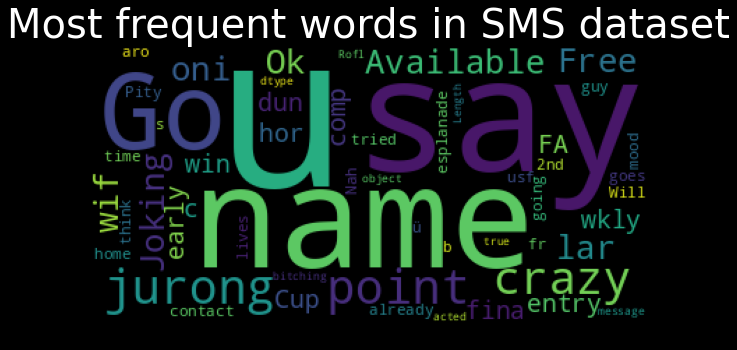

In [ ]:
# Define wordcloud function from wordcloud library.
wc = WordCloud()
wc.generate(str(data['message']))
# declare our figure 
plt.figure(figsize=(10,10), facecolor='k')
# add title to the graph
plt.title("Most frequent words in SMS dataset", fontsize=40, color='white')
plt.imshow(wc)
plt.show()